# Exploratory Data Analysis on New York City Airbnb Data

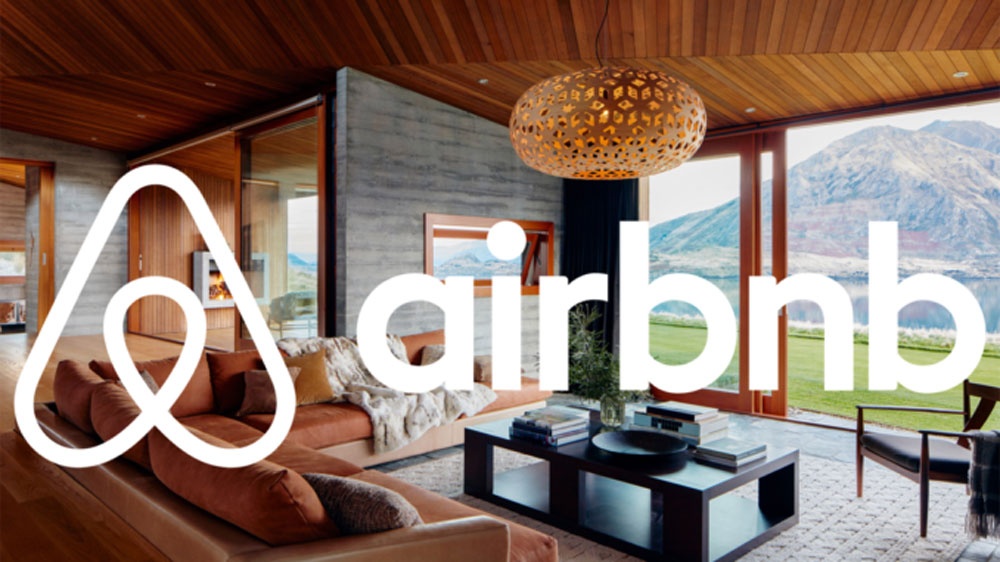

Airbnb is an American home rental platform based in San Francisco that lets people list, find, and rent short-term lodging in 65,000 cities and more than 191 countries across the globe. Founded in 2008 by Brian Chesky, Joe Gebbia, and Nathan Blecharczyk, it has done more than any other company to change the way people find places to stay away from home. In recent years, Airbnb has evolved its peer-to-peer model to give hosts the tech tools they need to run a seamless, sophisticated operation. More than 40% of Airbnb listings are now available via Instant Book, allowing guests to make reservations much as they would a hotel booking, and a new check-in tool automatically feeds arrival instructions to them via the app. The company has also expanded into Business Travel Ready listings, which offer travelers a designated work space, guaranteed Wi-Fi, and more. Now valued at $31 billion, the company is also helping travelers explore the world outside their rentals. In 2016, Airbnb launched Trips, a service that lures travelers out of their rentals for local tours and adventures in 20 countries and 30 cities around the globe. And in an effort to address humanitarian issues, Airbnb launched an Open Homes program in 2017 that allows hosts to offer housing to refugees, displaced travelers, and those seeking shelter after disasters. 

## Here's the outline of the project:

Downloading the data

Data preperation and cleaning

Data Analysis and visualization

Asking some intersting question and giving the giving the answer

Summary

Future work

References

We have dataset in google drive lets access the dataset by providing the following code that will automatically mount the drive and give the authentication to access the data .after that we use the `Pandas` library to read the csv file 

In [2]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1VPKliSq_NrRRXUNmAoZxMbD5b41sRDkF/view?usp=sharing'
 
import pandas as pd
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('xclara.csv') 
 
df_air = pd.read_csv('xclara.csv')
df_air.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Let me include all the soldiers in the battle!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Data Exploration and variable Identification:

In [4]:
#checking what are the variables here:
df_air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
#basic information about the dataset
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
#just a sanity check:
#looks all the property ids are different and each listings are different here!

df_air['id'].nunique()

48895

**So what are the numerical and categorical variables?**

By basic inspection I figured out that a particular property name will have one particular host_name hosted by that same individual but a particular host_name can have multiple properties in a area.

So, host_name is a categorical variable here. Also neighbourhood_group,neighbourhood and room_type fall into this category. <br>

While id, latitude, longitude,price,minimum_nights,number_of_reviews,last_review,	reviews_per_month	calculated_host_listings_count,	availability_365 are numerical variables

In [7]:
#looking out for categorical variables
df_air.loc[df_air['name']=='Clean & quiet apt home by the park']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [8]:
df_air[df_air['host_name']=='John'] #experimenting 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
429,148201,NYC - Sunny Greenwich Village 1br,715807,John,Manhattan,Greenwich Village,40.72831,-74.00177,Entire home/apt,175,3,18,2013-05-31,0.19,1,0
620,234870,Private Room With GREAT Location,1229984,John,Queens,Long Island City,40.74581,-73.95295,Private room,75,30,65,2017-07-31,0.74,3,219
991,400039,Big Beautiful Railroad in Brooklyn,1488809,John,Brooklyn,Bushwick,40.70339,-73.92945,Entire home/apt,130,30,53,2017-06-30,0.68,1,0
1141,484297,Large home in most desirable Brooklyn hood!,2397411,John,Brooklyn,Clinton Hill,40.68545,-73.96534,Entire home/apt,350,4,10,2018-09-12,0.12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47624,35836317,Gorgeous Duplex 2BED/1.5BA Modern,269242923,John,Manhattan,Kips Bay,40.74490,-73.97888,Entire home/apt,288,5,2,2019-06-30,2.00,1,74
47689,35871036,Huge 1 bedroom w/ a backyard near the heart of...,226414996,John,Queens,Ditmars Steinway,40.77170,-73.90799,Entire home/apt,90,3,0,NaN,NaN,2,21
47915,35984474,Perfect Weekend Stay,229739739,John,Brooklyn,Flatbush,40.64726,-73.95455,Private room,85,14,0,NaN,NaN,2,176
48212,36140542,Wonderful Summer Vacation Getaways For Weeken...,229739739,John,Brooklyn,Flatbush,40.64600,-73.95455,Private room,85,7,0,NaN,NaN,2,176


In [9]:
df_air[df_air['host_name']=='John']['name'].nunique()

293

In [10]:
df_air['neighbourhood'].nunique() #looks this can be a categorical var too. lets check as well

221

In [11]:
df_air['host_name'].nunique() #unique hosts

11452

In [12]:
df_air['name'].nunique() #unique listings

47905

In [13]:
df_air['name'].value_counts() 


Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64

An interesting observation, looks like few listings have no particular host name as below observation!
also few listings/property with same names has different hosts in different areas/neighbourhoods of a neighbourhood_group

In [14]:
df_air[df_air['name']==df_air['host_name']].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,2018-01-30,0.25,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,2015-10-30,0.15,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,NaN,NaN,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,2018-09-10,0.10,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90


looks there are few listings where the property name and the host have same names!
we can remove duplicates later in our analysis!

In [15]:
df_air[df_air['name']=='New york Multi-unit building'].head() 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2751,1489426,New york Multi-unit building,7964729,Justin,Manhattan,Financial District,40.70582,-74.00888,Entire home/apt,390,3,1,2018-09-13,0.10,1,0
19016,15100883,New york Multi-unit building,95623284,Pablo,Bronx,Fordham,40.86533,-73.89713,Private room,40,3,1,2018-09-24,0.10,1,179
33473,26463879,New york Multi-unit building,21682640,Clarise,Brooklyn,Flatbush,40.64258,-73.95952,Private room,65,30,0,NaN,NaN,2,365
34613,27457026,New york Multi-unit building,125320407,Sata,Queens,Jamaica,40.70653,-73.80561,Entire home/apt,1000,2,0,NaN,NaN,5,365
35177,27906346,New york Multi-unit building,27071572,Kinga,Manhattan,Upper West Side,40.79372,-73.97431,Entire home/apt,140,5,3,2019-04-24,0.29,1,89


##so on this viewpoint name also comes under categorical var!
##same property but hosted by different Airbnb hosts with different room_types & varied price ranges

In [16]:
df_air.loc[(df_air['neighbourhood_group']=='Manhattan') & (df_air['host_name']=='Natasha')].head() #experiment


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4702,3304307,Lovely Shiny Private Room in NYC,12465884,Natasha,Manhattan,East Harlem,40.79269,-73.94218,Private room,100,3,64,2019-06-01,1.05,1,219
4853,3458525,Modern & Cozy 1BD Garden Apt,17430718,Natasha,Manhattan,Harlem,40.81511,-73.94315,Entire home/apt,115,3,64,2019-06-19,1.05,2,211
8686,6673630,Stylish L.E.S Studio,6591262,Natasha,Manhattan,Lower East Side,40.71661,-73.98916,Entire home/apt,150,3,1,2015-08-01,0.02,1,0
9376,7193201,Private RM in Heart of East Village,33739627,Natasha,Manhattan,East Village,40.72896,-73.98430,Private room,99,1,4,2015-10-24,0.08,1,0
10310,7894907,Cosy studio in East Village,1830864,Natasha,Manhattan,East Village,40.72395,-73.98001,Entire home/apt,150,2,25,2016-07-22,0.55,1,0


 Same hosts have hosted for different properties in same neighbourhood groups!

In [17]:
df_air['host_id'].value_counts()[:4] #host ids with most listings counts

219517861    327
107434423    232
30283594     121
137358866    103
Name: host_id, dtype: int64

So, far I was trying to understand the two variables: name and host_name & its relationship with neighbourhood_group and neighbourhood.(only from the values present inside) <br>

Found out that: A host can have multiple properties in a neighbourhood group with different host-ids but a host with a particular property/listing in a particular neighbourhood of a neighbourhood group have a same host-id(not mandatory as there are exceptions where few hosts have diferrent id's for each listing/property in a neighbourhood)

Also the data so far tells, there might be cases where a particular host has co-hosted someone else's property/listing in a neighbourhood on Airbnb. 

We'll not bother much as these are not that important in our analysis and proceed further!

In [18]:
df_air.describe() #getting the overall summary statistics for all numerical columns

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Looks there are some property listed with 0 listed price!

In [19]:
len(df_air[df_air['price']==0]) #so 11 property/listings have 0 price listed.

11

##If a person trying to book a listing for stay/rent he/she will look into these following factors while booking:
name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews
these are the important ones in our analysis. We'll crosscheck though at last!

In [20]:
df_air['host_name'].value_counts()[:5] #5 hosts with most listings counts in entire NYC

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Name: host_name, dtype: int64

# Let's do the analysis step by step!

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


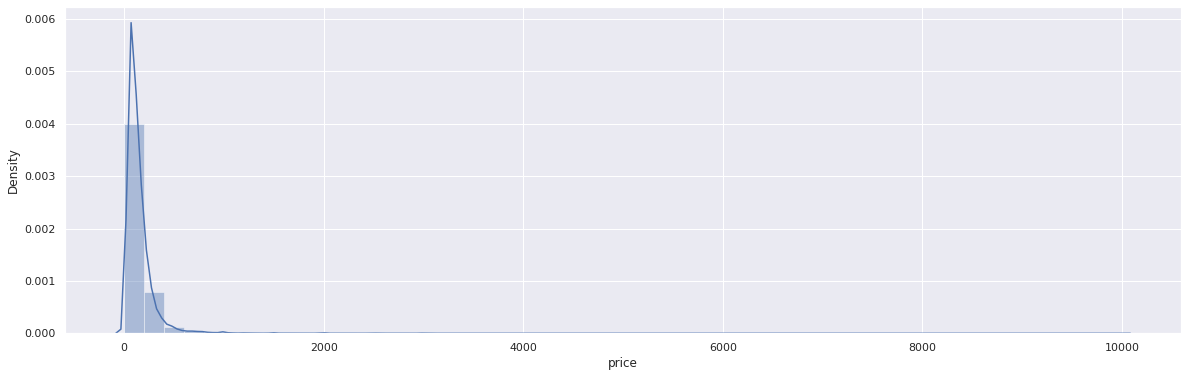

In [21]:
#distplot
# f,ax=plt.subplots(figsize=(8,6))
sns.set(rc={"figure.figsize": (20, 6)})
sns.distplot(df_air['price'],hist=True)

The distribution tells it has positive skew
also the distribution doesn't deviate much from normal distribution.

**checking the relationship between numerical variables!**

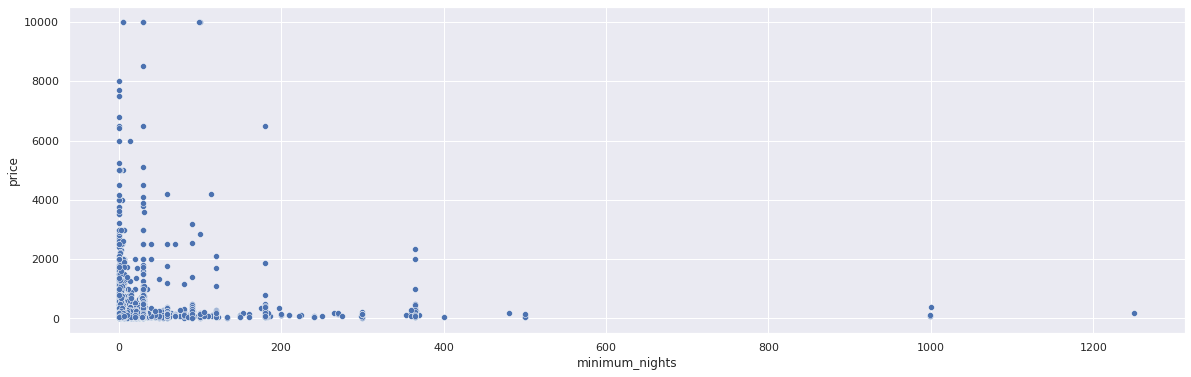

In [22]:
# price vs minimum_nights

var='minimum_nights'

sns.set(rc={"figure.figsize": (20, 6)})
sns.scatterplot(x=var,y='price',data=df_air)

looks many data points are clustured on 0 price range, few have min nights for stay but price is 0. looks like anomaly in price.
there are many outliers as well.

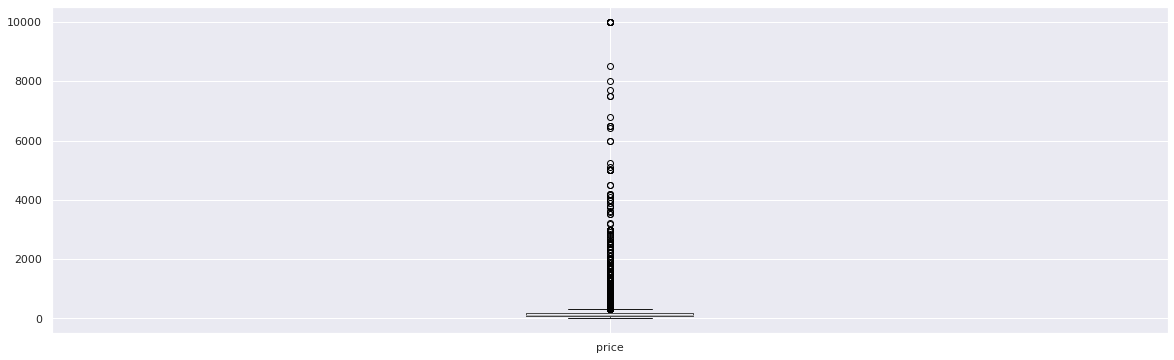

In [23]:
df_air.boxplot(column=['price'])
plt.show()


we can see the presence of many outliers in price. Definitely we'll remove those, Patience!

In [24]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Let's check the **correlation** matrix to understand how are the features interrelated with each other.<br> 

Also to get an idea which are the most important features in this data.




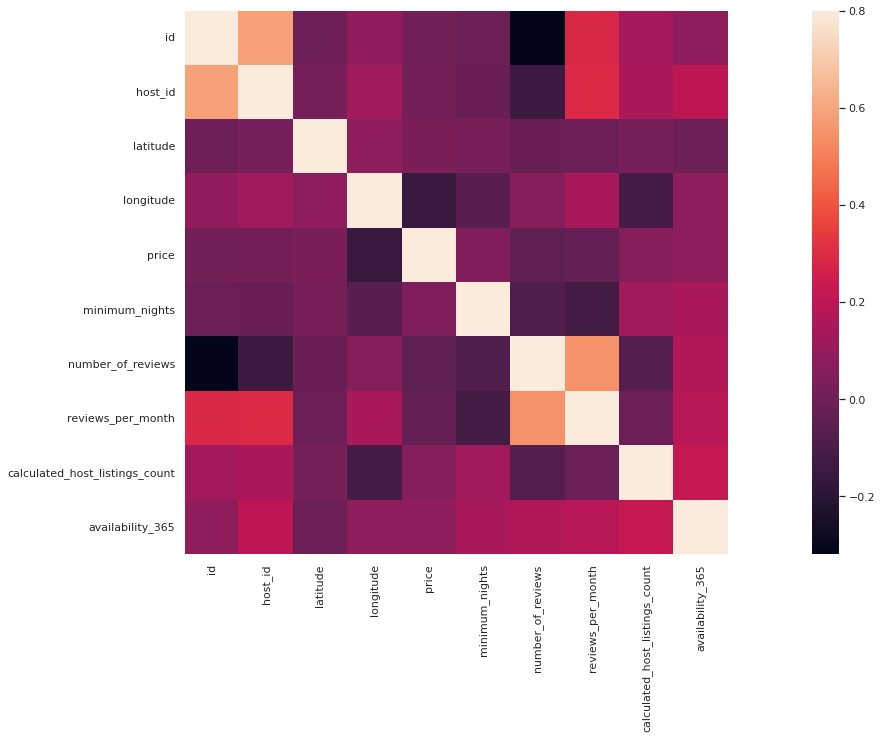

In [25]:
#correlation matrix
corrmat = df_air.corr()
sns.set(rc={"figure.figsize": (30, 10)})
sns.heatmap(corrmat, vmax=.8, square=True);

Clearly from the heatmap we can see the correlation between different features that can affect a airbnb listing. <br>

Guess what? There's correlation among host_id to reveiws_per_month & availability_365. Also there's noticiable correlation between min_nights to no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count. <br>

no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365!

**Data Pre-processing:**

In [26]:
#checking null values!
df_air.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Missing values**

*As*, host_names and names are not that important in our analysis, so atleast we are good to fill those with some substitutes in both the columns!
since both 'name' and 'host_name' has very less missing values as compared to 47,905 listings and 11452 unique hosts!
we can fill these missing values in both with unknown & no_name respectively!

In [27]:


df_air['name'].fillna('unknown',inplace=True)
df_air['host_name'].fillna('no_name',inplace=True)

In [28]:
df_air[['host_name','name']].isnull().values.any() #looks the null values are removed!

False

In [29]:
no_of_hosts= df_air['host_name'].nunique()
print(f'The no of hosts in NYC: {no_of_hosts}')
no_of_listings= df_air['name'].nunique()
print(f'The total no of listings in NYC: {no_of_listings}')

The no of hosts in NYC: 11453
The total no of listings in NYC: 47906


Also the column: 'last_review' has many null values. And since it's not much required for our analysis as compared to number_of_reviews & reviews_per_month. We're good to drop this column.

In [30]:
df_air= df_air.drop(['last_review'],axis=1)

In [31]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

**Checking for duplicate data**

In [32]:
duplicate_data = df_air.duplicated()
print(duplicate_data.sum())
df_air[duplicate_data]
#looks like there's no duplicate data present!

0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


## Handling the outliers

Lets look at the price column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


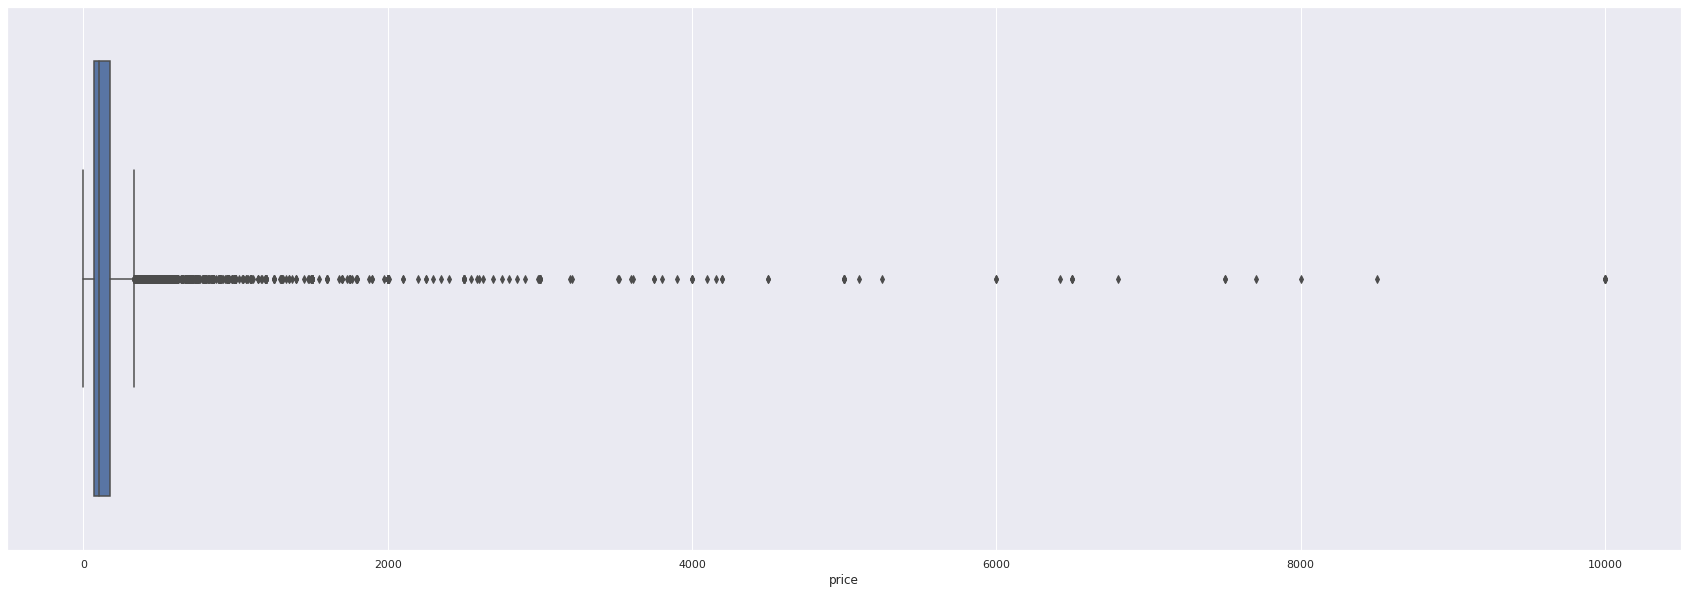

In [33]:
sns.boxplot(df_air['price'])

We can see there are lot of outliars in the price column.lets apply quantile approach to remove outliar

In [34]:
df_air.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [35]:
min_threshold,max_threshold= df_air.price.quantile([0.01,0.999])
min_threshold,max_threshold

(30.0, 3000.0)

In [36]:
df_air[df_air.price<min_threshold].head() #prices less than min threshold!

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
957,375249,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,0.92,1,226
2675,1428154,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,0.07,1,321
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,NaN,4,137
3020,1767037,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,5.53,3,50
3918,2431607,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,1.22,3,258


In [37]:
df_air[df_air.price>max_threshold].head() #similary for getting extreme price value above max_threshold

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,NaN,1,83
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,0.03,1,365
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,0.27,1,359
3695,2224896,NYC SuperBowl Wk 5 Bdrs River View,11353904,Todd,Manhattan,Upper West Side,40.79476,-73.97299,Entire home/apt,4000,1,0,NaN,1,0
3720,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,NaN,1,0


In [38]:
df_air_pnw= df_air[(df_air.price>min_threshold)&(df_air.price<max_threshold)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


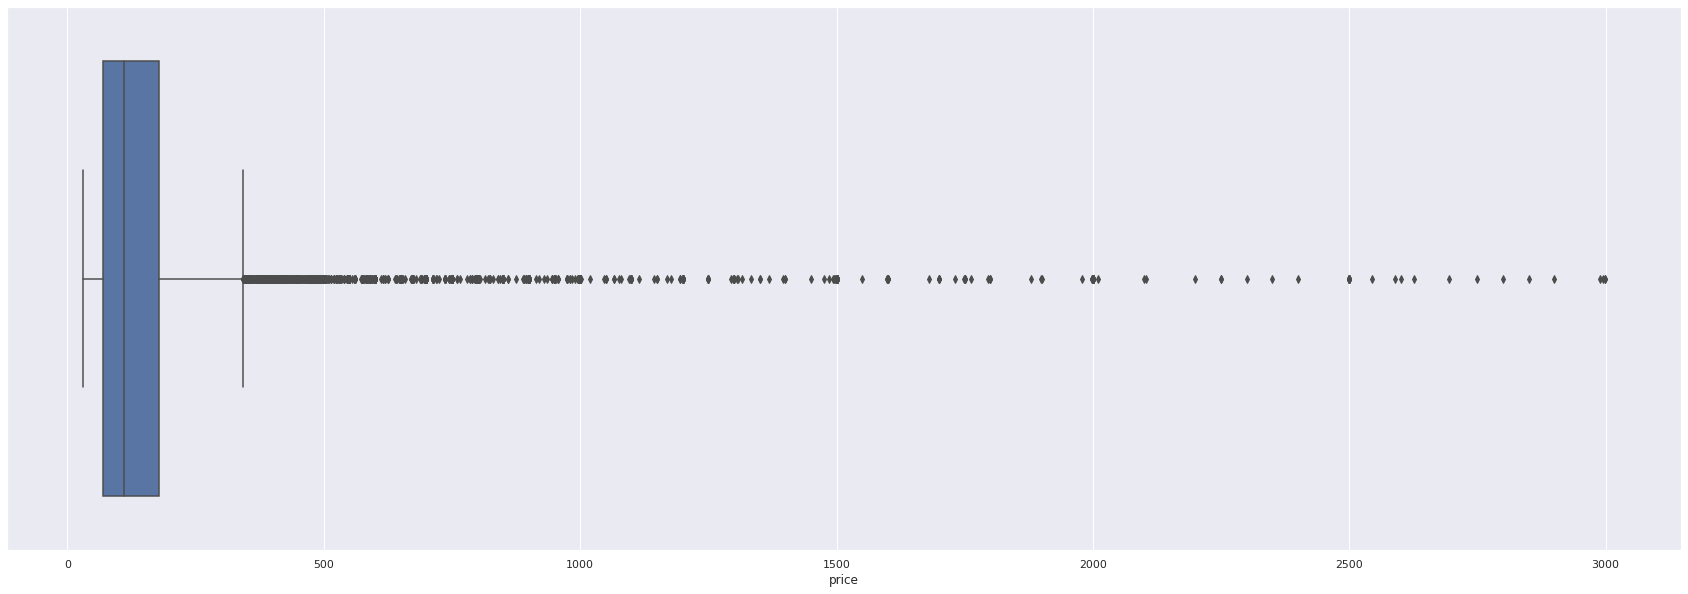

In [39]:
sns.boxplot(df_air_pnw['price']) #looks there are still many outliers!

**Removing Outliers using IQR approach!**
(has performed best in removing outliers)


In [40]:
Q1 = df_air.quantile(0.25)
Q3 = df_air.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                                1.968023e+07
host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.830000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64


## Writing a outlier function for removing outliers!

In [41]:

def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [42]:
lower_bound,upper_bound = outlier_treatment(df_air['price'])

## looking at the low and upper range outliers

In [43]:
df_air[(df_air.price < lower_bound) | (df_air.price > upper_bound)] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,0.12,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0.24,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,0.55,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,0.06,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,NaN,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,NaN,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,NaN,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,NaN,1,9


## Substitute only those rows having datapoints greater than lower range and lesser than upper range respectively


In [44]:
df_air_pnw1 = df_air[(df_air.price>lower_bound) & (df_air.price<upper_bound)]
df_air_pnw1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


 ## Let us plot boxplot for price without outliers!

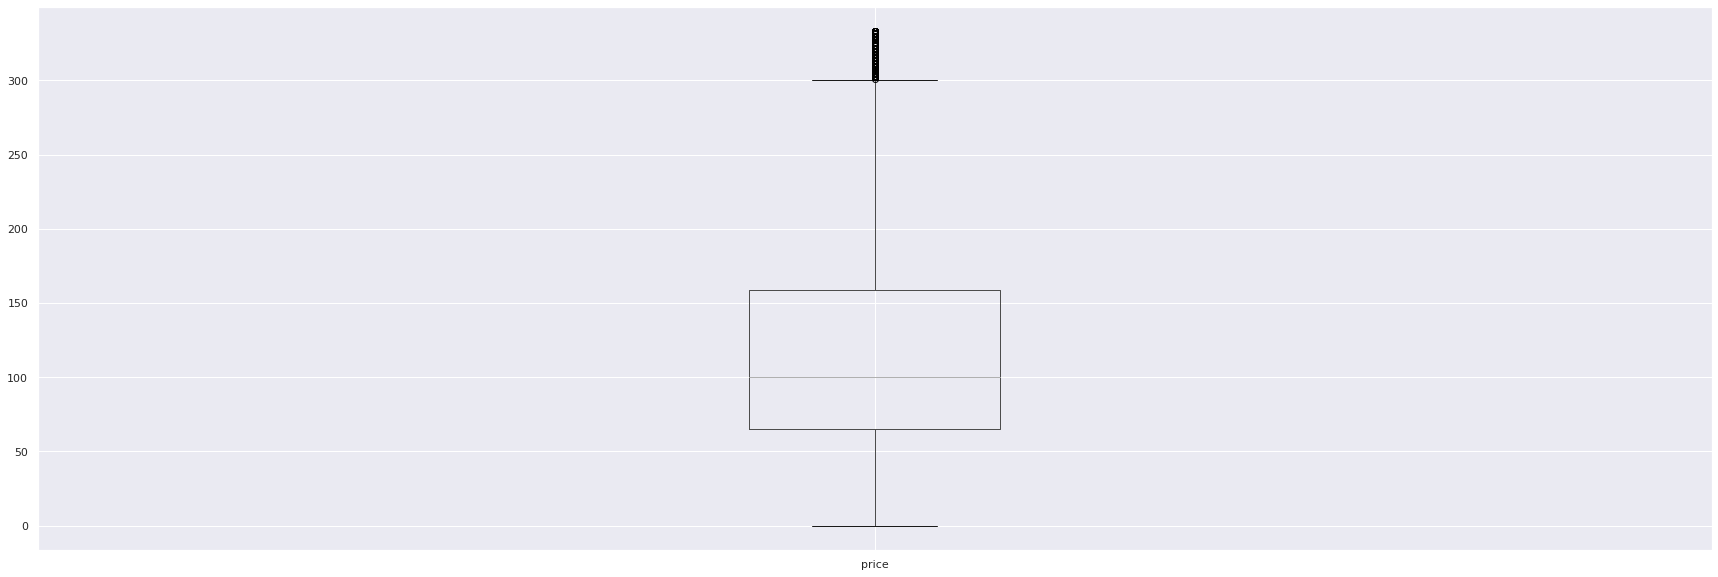

In [45]:
df_air_pnw1.boxplot(column='price') 

Its looks good Now we dont have the much outliers and we can perform our analysis


## Let's see what can be done with latitude and longitude!.We will try to find where the coordinates belong from the latitude and longitude


Text(0.5, 1.0, 'Location Co-ordinates')

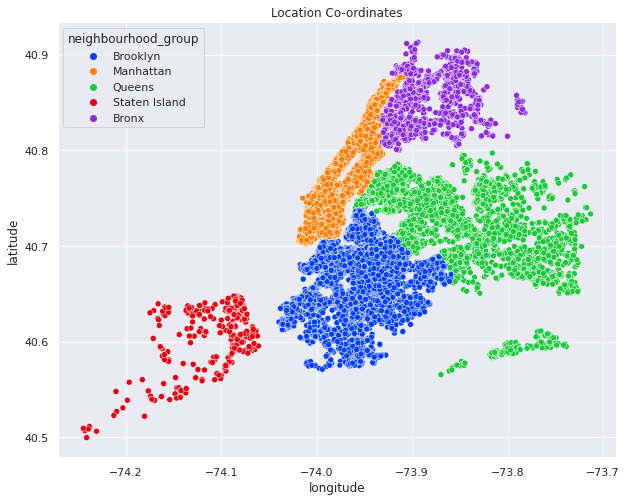

In [46]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=df_air_pnw, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')

## Let's observe the type of rooms as well

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

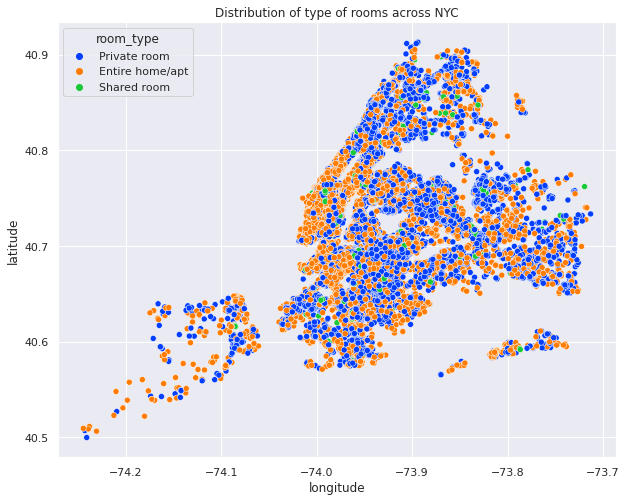

In [47]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=df_air_pnw.longitude, y=df_air_pnw.latitude,hue=df_air.room_type,palette='bright')
ax.set_title('Distribution of type of rooms across NYC')

By the two scatterplots of latitude vs longitude we can infer there's is very less shared room throughout NYC as compared to private and Entire home/apt.

95% of the listings on Airbnb are either Private room or Entire/home apt. Very few guests had opted for shared rooms on Airbnb.

Also, guests mostly prefer this room types when they are looking for a rent on Airbnb as we found out previously in our analysis.

## Now Let us ask some intersting question and try to give their answer in best possible manner

## Q1. Let's check the most no of listings in NYC first!

In [48]:
#top 5 listings on Airbnb in entire NYC:

listings_count_df=df_air['name'].value_counts()[:5].reset_index()
listings_count_df.rename(columns={'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)
listings_count_df

,Listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,unknown,16
3,New york Multi-unit building,16
4,Brooklyn Apartment,12


Hillside Hotel is found to have listed more listings in entire NYC, followed by Home away from Home.

## Q2. Top 10 hosts on the basis of no of listings in entire NYC!

In [49]:
top_10_hosts=df_air['host_name'].value_counts()[:10] 

In [50]:
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC!')

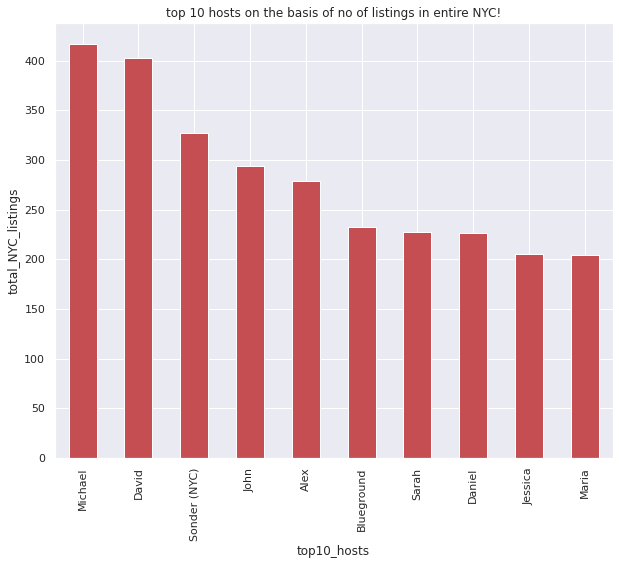

In [51]:
top_10_hosts.plot(kind='bar',color='r')
plt.xlabel('top10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts on the basis of no of listings in entire NYC!')

Well, let's deep dive into cost of living as it is the most important factor for someone willing to rent/stay using Airbnb.

Q3.**The costliest listing in the Entire NYC?**


In [52]:
df_air_pnw.nlargest(5,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type','price']]

,name,neighbourhood_group,neighbourhood,host_name,room_type,price
38498,"LUXURIOUS 5 bedroom, 4.5 bath home",Manhattan,Upper West Side,Lisa,Entire home/apt,2999
48304,Next to Times Square/Javits/MSG! Amazing 1BR!,Manhattan,Hell's Kitchen,Rogelio,Entire home/apt,2999
46533,Amazing Chelsea 4BR Loft!,Manhattan,Chelsea,Viberlyn,Entire home/apt,2995
30824,Designer's Beautiful 2BR Apartment in NOLITA/SOHO,Manhattan,Nolita,Ilo And Richard,Entire home/apt,2990
22992,"Modern Townhouse for Photo, Film & Daytime Ev...",Manhattan,Upper West Side,Lanie,Entire home/apt,2900


Looks like the all the top 5 costliest listings belongs to **Manhattan** itself(being the most costliest place of living in NYC)

Q4.**The Cheapest listing in the Entire NYC?**

In [53]:
df_air_pnw.sort_values(by='price',ascending=True)[['name','neighbourhood_group','neighbourhood','host_name','room_type','price']][:5]

,name,neighbourhood_group,neighbourhood,host_name,room_type,price
12516,cute and cozy room in brooklyn,Brooklyn,Bedford-Stuyvesant,Ornella,Private room,31
7864,Comfortable and Large Room,Brooklyn,Flatbush,Kay,Private room,31
29967,Large bed room share bathroom,Queens,Elmhurst,Cha,Private room,31
39100,15 minutes From Times Square!!,Manhattan,Washington Heights,Ari,Private room,31
28700,Cozy room in Loft Apartment - Brooklyn,Queens,Ridgewood,Estefani,Private room,31


Also, the cheapest listings mostly comes from **Brooklyn**, **Queens** and all are private rooms which makes sense. 

## Q5. Top neighbourhoods in NYC with respect to average price/day of Airbnb listings:

let's check for the neighbourhoods with listings having highest average price/day in each neighbourhood groups of NYC!

In [54]:
df_ngrp= df_air_pnw.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()

In [55]:
top_neigh_each= df_ngrp.loc[df_ngrp.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top_neigh_each

,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909
121,Manhattan,Tribeca,410.531429
163,Queens,Neponsit,274.666667


Among the top neighbourhoods in each neighbourhood groups, top 2 of them namely: **Fort Wadsworth** & **Sea Gate**, origins from **Staten Island** & **Brooklyn**. <br>

**Riverdale** from **Bronx** and **Tribeca** from **Manhattan**. **Neponsit** from **Queens**. 

Text(0, 0.5, 'price')

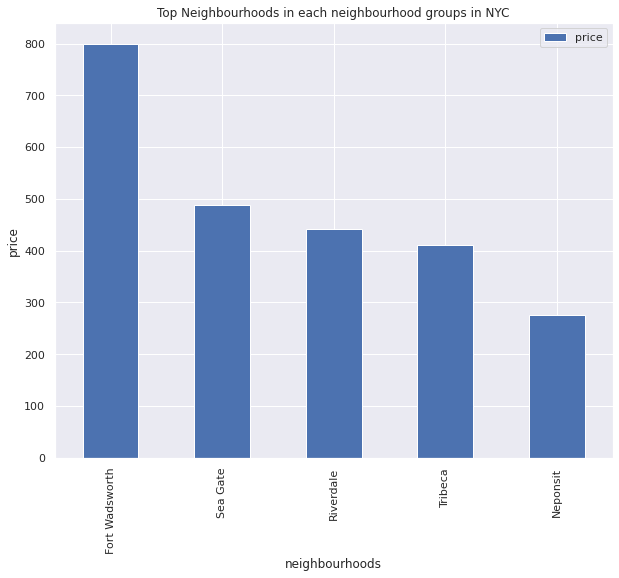

In [56]:
top_neigh_each.plot.bar(x='neighbourhood', rot=90, title='Top Neighbourhoods in each neighbourhood groups in NYC')
plt.xlabel('neighbourhoods')
plt.ylabel('price')

# Q6. Let's checkout the costliest listings in each neighbourhood groups & their respective hosts:

In [57]:
#costliest listings in each neighbourhood groups
costliest_df= df_air_pnw.loc[df_air_pnw.groupby(['neighbourhood_group'])['price'].idxmax()][['name','neighbourhood_group','host_name','price']]

In [58]:
costliest_df.sort_values(by='price',ascending=False)

,name,neighbourhood_group,host_name,price
38498,"LUXURIOUS 5 bedroom, 4.5 bath home",Manhattan,Lisa,2999
29665,Park Place Townhouse by (Hidden by Airbnb),Brooklyn,Sally,2626
42680,Majestic Mansion LifeStyle :),Queens,Shah,2600
24477,"""The luxury of Comfort""",Bronx,Kathy,2500
45572,Central Hall Colonial with Free Parking Bus EX...,Staten Island,Anastasios,1250


Looks like the top 2 costliest listings: **LUXURIOUS 5 bedroom, 4.5 bath home** & **Park Place Townhouse** were from Manhattan and Brooklyn, hosted by Lisa and Sally respectively.

## Q7. **The cheapest listings in each neighbourhood groups & their respective hosts:**

In [59]:
#cheapest listings in each neighbourhood groups
cheapest_df= df_air_pnw.loc[df_air_pnw.groupby('neighbourhood_group')['price'].idxmin()][['neighbourhood_group','name','host_name','price']]

In [60]:
cheapest_df.sort_values(by='price',ascending=True)

,neighbourhood_group,name,host_name,price
2887,Brooklyn,Amazing Spacious Room,Lord Daniel,31
7431,Manhattan,Cozy room right on BROADWAY - Washington Heights,Nga,31
6615,Queens,"Super Clean, Quiet & Spacious Room",Troy,31
30312,Staten Island,Nice room near SI Ferry \n15 minutes by car.,Sara I,31
3889,Bronx,"A Simple, Calm Space",Août,32


Looks almost all the neighbourhood groups with the lowest price falls in the same price range for the cheapest listings.

## **Q8. On an average for how many nights people stayed in each room_types!**

Text(0, 0.5, 'Min Stays')

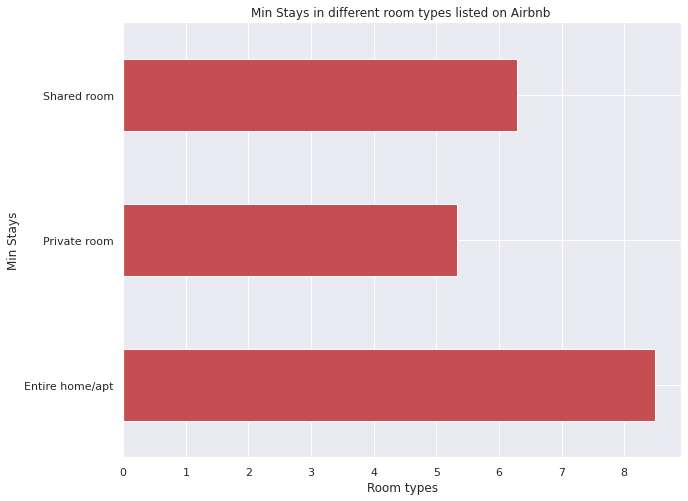

In [61]:
# min_night= df_air_pnw['room_type']
df_air_pnw.groupby('room_type')['minimum_nights'].mean().plot(kind='barh',color='r')
plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('Room types')
plt.ylabel('Min Stays')
# ax = sns.swarmplot(x="room_type", y="minimum_nights", data=df_air)

Looking at these it clearly indicates that people mostly prefer living in an **entire home/apt** on an average of more than **8 nights** followed by guests who stayed in **shared room** where average stay is **6-7 nights**.

# Let's play around with the reviews on listings in NYC!

## **Q9. Top 10 most reviewed listings in NYC!**

In [62]:
top10_reviewed_listings= df_air.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','reviews_per_month','neighbourhood_group']]

,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan
42076,Great Room in the heart of Times Square!,27.95,Manhattan
38870,Lou's Palace-So much for so little,20.94,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Queens
36238,“For Heaven Cakes”,15.78,Queens
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Queens


So, this are the listings with highest number of reviews, the highest being: **Enjoy great views of the City in our Deluxe Room!** with 58 reviews/month followed by **Great Room in the heart of Times Square!** with a total of 27 reviews/month. Top 2 are from Manhattan so we can decide the best suited place for a comfortable stay but the prices are high to afford.  

## Lets look how monthly reviews varies with room types in each neighbourhood groups!

Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

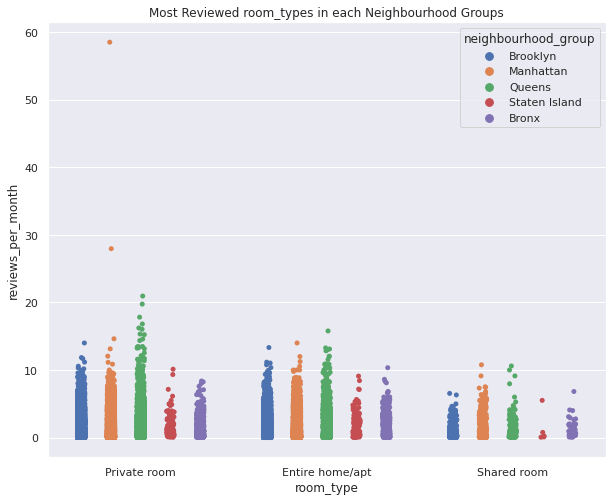

In [63]:
f,ax = plt.subplots(figsize=(10,8))
ax= sns.stripplot(x='room_type',y='reviews_per_month',hue='neighbourhood_group',dodge=True,data=df_air)
ax.set_title('Most Reviewed room_types in each Neighbourhood Groups')

We can see that **Private room** recieved the most no of reviews/month where **Manhattan** had the highest reviews received for Private rooms with more than 50 reviews/month, followed by **Manhattan** in the chase. <br>

Manhattan & Queens got the most no of reviews for Entire home/apt room type. <br>

There were less reviews recieved from **shared rooms** as compared to other room types and it was from **Staten Island** followed by **Bronx**.

## **Q10. Let's find the top 10 reviewed hosts on the basis of reviews/month.**

Text(0.5, 1.0, 'Top 10 Reviews/month received by hosts')

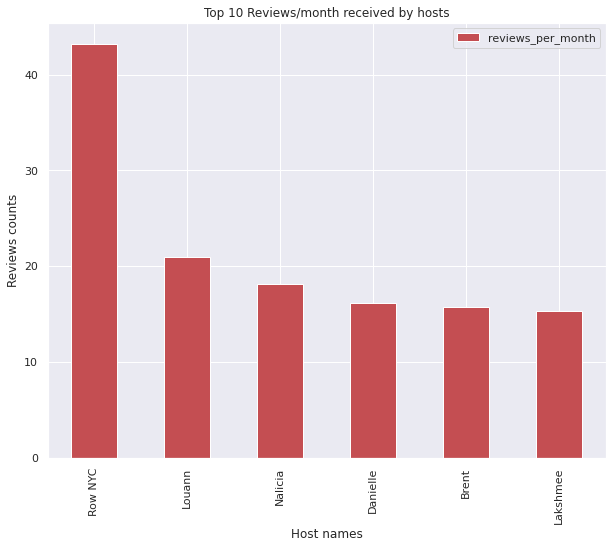

In [64]:
#there are cases where same hosts are hosting multiple properties in same/different areas.
reviews_df=top10_reviewed_listings.groupby('host_name')['reviews_per_month'].mean() 
reviews_df=reviews_df.reset_index().sort_values(by='reviews_per_month',ascending=False)
reviews_df.plot(x='host_name',y='reviews_per_month',kind='bar',color='r')
plt.ylabel('Reviews counts')
plt.xlabel('Host names')
plt.title('Top 10 Reviews/month received by hosts')

Row NYC holds the title as the most reviewed host with more than 40 reviews/month on average.

## **Q11. Hosts with most no of listings in NYC(on the basis of host listings count):**

In [65]:
host_with_most_listings= df_air.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(10,'calculated_host_listings_count')
largest_listings_df

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,106929
1834,Blueground,Manhattan,53360
7275,Kara,Manhattan,14669
6540,Jeremy & Laura,Manhattan,9216
13216,Sonder,Manhattan,9216
2901,Corporate Housing,Manhattan,8281
7480,Kazuya,Queens,8137
7546,Ken,Manhattan,7500
11399,Pranjal,Manhattan,4225
9856,Mike,Manhattan,2824


So, **Sonder(NYC)** leads the most expensive neighbourhood group in NYC with around 106929 properties listed followed by Blueground and Kara. <br>

Also, all 3 of them has their listings on Manhattan.

We can also check for **hosts with most listings in each neighbourhood group**.<br>

The hosts leading each neighbourhood group with most no of Airbnb listings in entire NYC.

In [66]:
hosts_df=host_with_most_listings.groupby(['neighbourhood_group'])['calculated_host_listings_count'].transform(max) == host_with_most_listings['calculated_host_listings_count']
host_with_most_listings[hosts_df].sort_values(by='calculated_host_listings_count',ascending=False)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,106929
7480,Kazuya,Queens,8137
14432,Vida,Brooklyn,2705
14435,Vie,Bronx,169
685,Amarjit S,Staten Island,64


So, **Sonder (NYC)**, Kazuya, Vida, Vie and Amarjit are the hosts with most no of listings in each neighbourhood groups in entire NYC!

# Room_types and their relation with availability in different neighbourhood groups!

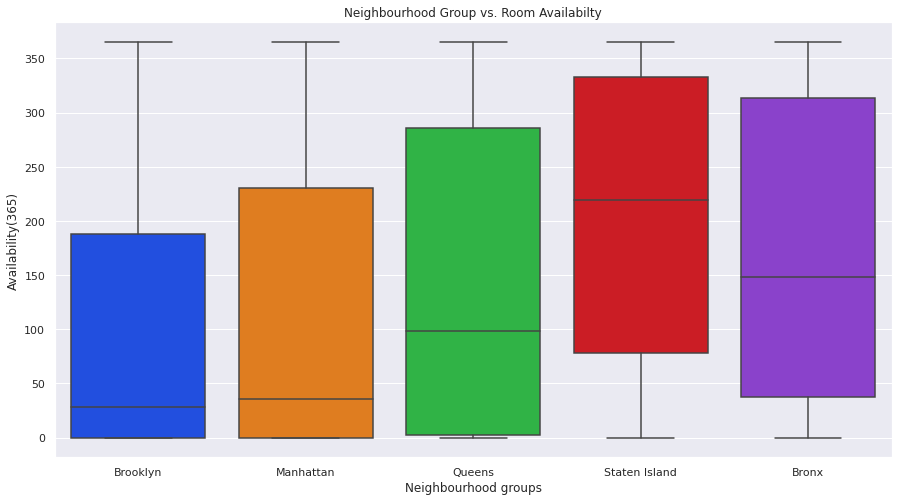

In [67]:
f,ax = plt.subplots(figsize=(15,8))
ax=sns.boxplot(x='neighbourhood_group',y='availability_365',data=df_air,palette="bright")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

Looking at the above categorical box plot we can infer that the listings in **Staten Island** seems to be more available throughout the year to more than 300 days. On an average, these listings are available to around 210 days every year followed by **Bronx** where every listings are available for 150 on an average every year.

# Summary
 I've reached almost the end of the analysis. There might be few analysis which can be done more.We philosophied about the variables, we analysed 'price' and also checked with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables. That's a lot of work that Python helped us make easier.

## At the end of this project, we were able to make some of these inferences:
   

*   Hillside Hotel is found to have listed more listings in entire NYC, followed by Home away from Home.
*   Micheal is the top host with 417 listing followed by david with 403 listing.

*   Top costliest listing are belongs to Manhattan only with a top price of $2999. 

*    The cheapest listings mostly comes from Brooklyn, Queens with price of $99 and all are private rooms which makes sense.

*   people mostly prefer living in an entire home/apt on an average of more than 8 nights followed by guests who stayed in shared room where average stay is 6-7 nightsand the least number is for private room with 5 days.
*  The listing `Enjoy great views of the City in our Deluxe Room!`  top the list of highest number of reviews per month which is double than the 2nd rank listing `Great Room in the heart of Times Square!` and both listing are from `Manhattan`

*   Private room recieved the most no of reviews/month where Manhattan had the highest reviews received for Private rooms with more than 50 reviews/month, followed by Manhattan in the chase
*   Manhattan & Queens got the most no of reviews for Entire home/apt room type.

*  Sonder(NYC) leads the most expensive neighbourhood group in NYC with around 106929 properties listed followed by Blueground and Kara.



















## Future work
Interesting analysis can be done by comparing Google playstore and Apple 

*   Interesting analysis can be done by ploting the longitude and latitude so that we have more sense for the price according to the region.
*   We can also do price prediction according to the type of room ,neighbourhood and by seeing the correlation between different features



## References

Exploratory Data Analysis : https://en.wikipedia.org/wiki/Exploratory_data_analysis

Pandas Documentation: https://pandas.pydata.org/docs/user_guide/index.html

Numpy Documentation: https://numpy.org/doc/

Seaborn : https://seaborn.pydata.org/examples/index.html

Matplotlib : https://matplotlib.org/3.1.1/gallery/index.html

Outlier detection in python: https://towardsdatascience.com/practical-implementation-of-outlier-detection-in-python-90680453b3ce